# TimeGAN Tutorial

## Time-series Generative Adversarial Networks

- Paper: Jinsung Yoon, Daniel Jarrett, Mihaela van der Schaar, "Time-series Generative Adversarial Networks," Neural Information Processing Systems (NeurIPS), 2019.

- Paper link: https://papers.nips.cc/paper/8789-time-series-generative-adversarial-networks

- Last updated Date: April 24th 2020

- Code author: Jinsung Yoon (jsyoon0823@gmail.com)

This notebook describes the user-guide of a time-series synthetic data generation application using timeGAN framework. We use Stock, Energy, and Sine dataset as examples.

### Prerequisite
Clone https://github.com/jsyoon0823/timeGAN.git to the current directory.

## Necessary packages and functions call

- timegan: Synthetic time-series data generation module
- data_loading: 2 real datasets and 1 synthetic datasets loading and preprocessing
- metrics: 
    - discriminative_metrics: classify real data from synthetic data
    - predictive_metrics: train on synthetic, test on real
    - visualization: PCA and tSNE analyses

In [1]:
## Necessary packages
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
import warnings
warnings.filterwarnings("ignore")

# 1. TimeGAN model
from timegan import timegan
# 2. Data loading
from data_loading import real_data_loading, sine_data_generation
# 3. Metrics
from metrics.discriminative_metrics import discriminative_score_metrics
from metrics.predictive_metrics import predictive_score_metrics
from metrics.visualization_metrics import visualization

## Data Loading

Load original dataset and preprocess the loaded data.

- data_name: stock, energy, or sine
- seq_len: sequence length of the time-series data

In [2]:
## Data loading
data_name = 'mystock'
seq_len = 20

if data_name in ['stock', 'energy', 'mystock']:
  ori_data = real_data_loading(data_name, seq_len)
elif data_name == 'sine':
  # Set number of samples and its dimensions
  no, dim = 1000, 5
  ori_data = sine_data_generation(no, seq_len, dim)
    
print(data_name + ' dataset is ready.')

mystock dataset is ready.


## Set network parameters

TimeGAN network parameters should be optimized for different datasets.

- module: gru, lstm, or lstmLN
- hidden_dim: hidden dimensions
- num_layer: number of layers
- iteration: number of training iterations
- batch_size: the number of samples in each batch

In [3]:
## Newtork parameters
parameters = dict()

parameters['module'] = 'gru' 
parameters['hidden_dim'] = 24
parameters['num_layer'] = 3
parameters['iterations'] = 30000
parameters['batch_size'] = 128

## Run TimeGAN for synthetic time-series data generation

TimeGAN uses the original data and network parameters to return the generated synthetic data.

In [4]:
# Run TimeGAN
generated_data = timegan(ori_data, parameters)   
print('Finish Synthetic Data Generation')





Instructions for updating:
This class is equivalent as tf.keras.layers.GRUCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
This class is equivalent as tf.keras.layers.StackedRNNCells, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Please use `layer.add_weight` method instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons


## Evaluate the generated data

### 1. Discriminative score

To evaluate the classification accuracy between original and synthetic data using post-hoc RNN network. The output is |classification accuracy - 0.5|.

- metric_iteration: the number of iterations for metric computation.

In [5]:
metric_iteration = 5

discriminative_score = list()
for _ in range(metric_iteration):
  temp_disc = discriminative_score_metrics(ori_data, generated_data)
  discriminative_score.append(temp_disc)

print('Discriminative score: ' + str(np.round(np.mean(discriminative_score), 4)))

Instructions for updating:
Please use tf.global_variables instead.
Discriminative score: 0.0712


## Evaluate the generated data

### 2. Predictive score

To evaluate the prediction performance on train on synthetic, test on real setting. More specifically, we use Post-hoc RNN architecture to predict one-step ahead and report the performance in terms of MAE.

In [6]:
predictive_score = list()
for tt in range(metric_iteration):
  temp_pred = predictive_score_metrics(ori_data, generated_data)
  predictive_score.append(temp_pred)   
    
print('Predictive score: ' + str(np.round(np.mean(predictive_score), 4)))


Predictive score: 0.2014


## Evaluate the generated data

### 3. Visualization

We visualize the original and synthetic data distributions using PCA and tSNE analysis.

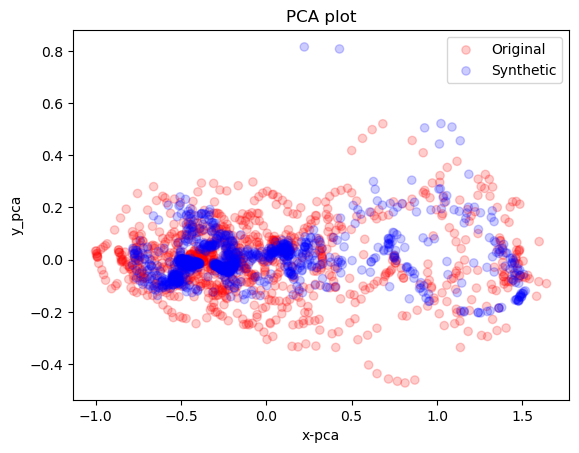

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2000 samples in 0.001s...
[t-SNE] Computed neighbors for 2000 samples in 0.149s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2000
[t-SNE] Computed conditional probabilities for sample 2000 / 2000
[t-SNE] Mean sigma: 0.049000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 59.149307
[t-SNE] KL divergence after 300 iterations: 0.869112


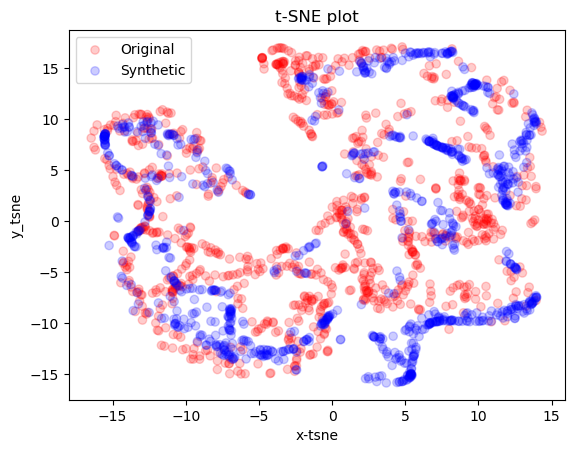

In [7]:
visualization(ori_data, generated_data, 'pca')
visualization(ori_data, generated_data, 'tsne')

# Test

In [8]:
np_ori_data = np.asarray(ori_data)
np_ori_data.shape

(1612, 20, 3)

In [9]:
np_gen_data = np.asarray(generated_data)
np_gen_data.shape

(1612, 20, 3)

## Viz - randomly selected windows

In [10]:
from plotly.subplots import make_subplots
from plotly import colors
import plotly.graph_objects as go

n_samples = 10 # to be divided by 2
mycolors = colors.DEFAULT_PLOTLY_COLORS

# VIZ - Open samples
# get random samples from all generated
samples = np.random.choice(np_ori_data.shape[0], n_samples)
x = np.array(range(np_ori_data.shape[1]))

fig = make_subplots(rows=int(n_samples/2), cols=2,
                    shared_xaxes=True,
                    vertical_spacing=0.02)
row = 0
col = 1
i = 0

for s in samples:
    if i % 2 == 0:
        row = row + 1
        col = 1
    else:
        col = 2

    fig.add_trace(go.Scatter(name='Ori', x=x, y=np_ori_data[s,:,0], line=dict(width=2, color=mycolors[0]), showlegend=True),
                row=row, col=col)
    fig.add_trace(go.Scatter(name='Gen', x=x, y=np_gen_data[s,:,0], line=dict(width=2, color=mycolors[1]), showlegend=True),
                row=row, col=col)
    i = i + 1

fig.update_layout(height=1400, width=1400,
                  title_text="Open")
fig.update_layout()
fig.update_layout(template="plotly_dark")
fig.show()

In [11]:
# VIZ - Volume samples
# get random samples from all generated
fig = make_subplots(rows=int(n_samples/2), cols=2,
                    shared_xaxes=True,
                    vertical_spacing=0.02)
row = 0
col = 1
i = 0

for s in samples:
    if i % 2 == 0:
        row = row + 1
        col = 1
    else:
        col = 2

    fig.add_trace(go.Scatter(name='Ori', x=x, y=np_ori_data[s,:,1], line=dict(width=2, color=mycolors[0]), showlegend=True),
                row=row, col=col)
    fig.add_trace(go.Scatter(name='Gen', x=x, y=np_gen_data[s,:,1], line=dict(width=2, color=mycolors[1]), showlegend=True),
                row=row, col=col)
    i = i + 1

fig.update_layout(height=1400, width=1400,
                  title_text="Volume")
fig.update_layout()
fig.update_layout(template="plotly_dark")
fig.show()

In [12]:
# VIZ - FGI samples
# get random samples from all generated
fig = make_subplots(rows=int(n_samples/2), cols=2,
                    shared_xaxes=True,
                    vertical_spacing=0.02)
row = 0
col = 1
i = 0

for s in samples:
    if i % 2 == 0:
        row = row + 1
        col = 1
    else:
        col = 2

    fig.add_trace(go.Scatter(name='Ori', x=x, y=np_ori_data[s,:,2], line=dict(width=2, color=mycolors[0]), showlegend=True),
                row=row, col=col)
    fig.add_trace(go.Scatter(name='Gen', x=x, y=np_gen_data[s,:,2], line=dict(width=2, color=mycolors[1]), showlegend=True),
                row=row, col=col)
    i = i + 1

fig.update_layout(height=1400, width=1400,
                  title_text="Volume")
fig.update_layout()
fig.update_layout(template="plotly_dark")
fig.show()

# Export

In [16]:
np_gen_data

array([[[0.09637389, 0.05755985, 0.36261245],
        [0.09768003, 0.05855075, 0.50143302],
        [0.10061276, 0.07035747, 0.56560898],
        ...,
        [0.08655581, 0.07994318, 0.42512817],
        [0.0863485 , 0.07842386, 0.4124269 ],
        [0.08612987, 0.07715487, 0.39844863]],

       [[0.31533164, 0.13822541, 0.90821816],
        [0.34379908, 0.19321585, 0.99580205],
        [0.31963366, 0.16043094, 0.96214343],
        ...,
        [0.25967032, 0.11635047, 0.98136378],
        [0.2495459 , 0.12037018, 0.97967191],
        [0.24493995, 0.11160344, 0.98208118]],

       [[0.08473563, 0.03454104, 0.30402919],
        [0.08167604, 0.03707626, 0.32600325],
        [0.09051931, 0.030637  , 0.35311045],
        ...,
        [0.06955984, 0.0243386 , 0.16873727],
        [0.07186919, 0.03212196, 0.24323002],
        [0.06562734, 0.0269182 , 0.12581761]],

       ...,

       [[0.49654093, 0.06767207, 0.18277485],
        [0.4943592 , 0.05907372, 0.19758476],
        [0.50285017, 0

In [20]:
np.array(np_gen_data).reshape((1612,60)).reshape((1612,20,3))

array([[[0.09637389, 0.05755985, 0.36261245],
        [0.09768003, 0.05855075, 0.50143302],
        [0.10061276, 0.07035747, 0.56560898],
        ...,
        [0.08655581, 0.07994318, 0.42512817],
        [0.0863485 , 0.07842386, 0.4124269 ],
        [0.08612987, 0.07715487, 0.39844863]],

       [[0.31533164, 0.13822541, 0.90821816],
        [0.34379908, 0.19321585, 0.99580205],
        [0.31963366, 0.16043094, 0.96214343],
        ...,
        [0.25967032, 0.11635047, 0.98136378],
        [0.2495459 , 0.12037018, 0.97967191],
        [0.24493995, 0.11160344, 0.98208118]],

       [[0.08473563, 0.03454104, 0.30402919],
        [0.08167604, 0.03707626, 0.32600325],
        [0.09051931, 0.030637  , 0.35311045],
        ...,
        [0.06955984, 0.0243386 , 0.16873727],
        [0.07186919, 0.03212196, 0.24323002],
        [0.06562734, 0.0269182 , 0.12581761]],

       ...,

       [[0.49654093, 0.06767207, 0.18277485],
        [0.4943592 , 0.05907372, 0.19758476],
        [0.50285017, 0

In [21]:
# export
np.savetxt("./data/generated_stock_data.csv", np.array(np_gen_data).reshape((1612,60)), delimiter=",")

In [22]:
a = np.genfromtxt("./data/generated_stock_data.csv", delimiter=',')
a

array([[0.09637389, 0.05755985, 0.36261245, ..., 0.08612987, 0.07715487,
        0.39844863],
       [0.31533164, 0.13822541, 0.90821816, ..., 0.24493995, 0.11160344,
        0.98208118],
       [0.08473563, 0.03454104, 0.30402919, ..., 0.06562734, 0.0269182 ,
        0.12581761],
       ...,
       [0.49654093, 0.06767207, 0.18277485, ..., 0.50466597, 0.07386318,
        0.22637988],
       [0.6889292 , 0.26103431, 0.80984595, ..., 0.40933251, 0.20466256,
        0.98163421],
       [0.24320316, 0.06806222, 0.23360739, ..., 0.26258358, 0.06356922,
        0.05054864]])